In [2]:
# import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import string

/Users/iremakcay/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv('winequality-red.csv')

In [4]:
print(data.head())

  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                  

In [5]:
print(data.columns)

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


# There are some extra characters (quotes and semicolons) between the column names. I used delimiter to get rid of them

In [6]:
data = pd.read_csv('winequality-red.csv', delimiter=';')

In [7]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# I categorized the wine quality as low (0-5) and high (6-10). Quality 6 and above was classified as high (1), and below was classified as low (0). 

In [8]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [9]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

# I determined the features (X) that I will use to train the model and the target variable (y) that I am trying to predict.

In [10]:
X = data.drop('quality', axis=1)
y = data['quality']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I scaled the data

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

# I created and trained a Naive Bayes model

In [15]:
model = GaussianNB()

In [16]:
model.fit(X_train, y_train)

GaussianNB()

# This output (GaussianNB) indicates that the model was successfully trained and is a Gaussian Naive Bayes classifier.

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)


# I calculated accuracy to see the performance of the model on the test data set.

In [19]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.734375


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [21]:
print(f'confusion_matrix :\n{conf_matrix}')

confusion_matrix :
[[ 97  44]
 [ 41 138]]


In [ ]:
#This confusion matrix shows the performance of the model by dividing it into four different categories: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
#TP (True Positive): 138 (Model correctly predicted 138 positive samples)
#FP (False Positive): 44 (Model incorrectly predicted 44 negative samples as positive)
#FN (False Negative): 41 (Model incorrectly predicted 41 positive samples as negative)
#TN (True Negative): 97 (Model correctly predicted 97 negative samples)

In [22]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of wine quality

In [31]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
#to get our quality column with the original data not with the 1 or 0 

In [32]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/Users/iremakcay/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


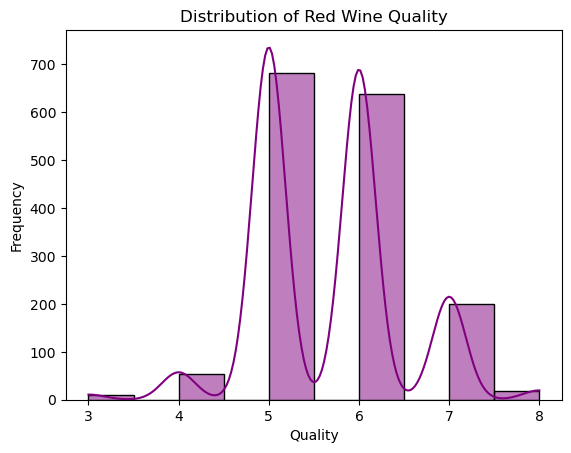

In [35]:
sns.histplot(data['quality'], bins=10, kde=True, color='purple')
plt.title('Distribution of Red Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

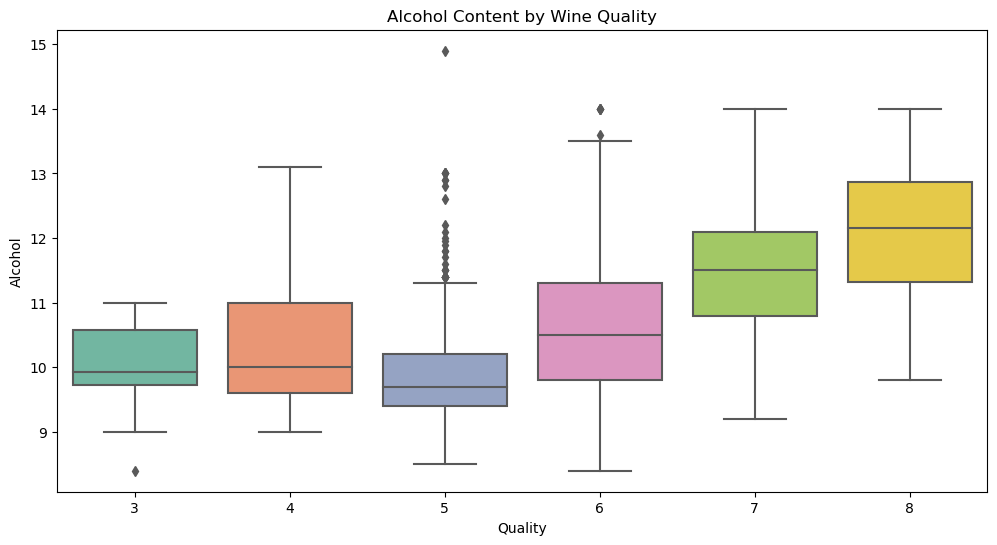

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=data, palette='Set2')
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# Each box represents the distribution of alcohol content of wines of a certain quality level. The thick line in the middle of each box shows the median alcohol content. The median is the middle value of the data set and represents the mean of the distribution.


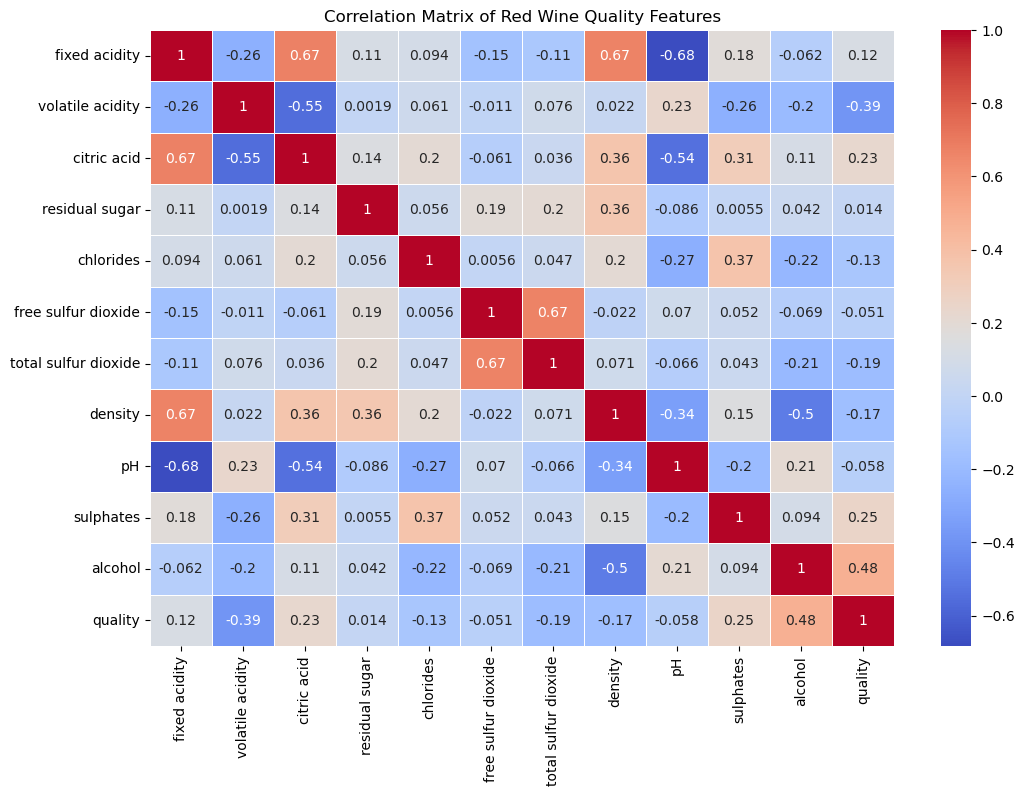

In [38]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Red Wine Quality Features')
plt.show()